In [70]:
import os
import sys
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.utils.data import TensorDataset, DataLoader, random_split
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision import transforms

!pip install pytorch_msssim
from pytorch_msssim import SSIM

!pip install adabelief_pytorch
from adabelief_pytorch import AdaBelief

import torch.nn.functional as F

!pip install livelossplot
from livelossplot import PlotLosses
import matplotlib.pyplot as plt







In [2]:
# Pull and install necessary files
!gdown 1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY # run.sh
!gdown --folder 1-PJmUzB9HN3mCKsl7qKGlUynltY5ttp7 # ese-invldm
!gdown --folder 1-V9EOGuiYOiszIg3pA15D9ThwXO1gr4E # files
!chmod +x run.sh
!bash ./run.sh
sys.path.append('/content/ese-invldm')

Downloading...
From (original): https://drive.google.com/uc?id=1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY
From (redirected): https://drive.google.com/uc?id=1-6JPxY7rUySRaCXTKHD400e8UWs2DZiY&confirm=t&uuid=8a93a149-7251-4e66-b35c-bae6580f2445
To: /content/run.sh
100% 530/530 [00:00<00:00, 2.73MB/s]
Retrieving folder contents
Retrieving folder 1Kc3TJ6yXVM6ugT_i4OBX5yH0Bf_oTYas ese_invldm
Processing file 1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG __init__.py
Processing file 1IjiAQ0hqDfpqYxh4zSKEfsAh7iV8226i ese_invldm.py
Processing file 1JlBHxSRrEUewrHmGcf4S8hh02Sz-xT66 setup.py
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG
From (redirected): https://drive.google.com/uc?id=1J-KQfIzlYuWH_qAMP_7kY0AT12NTANEG&confirm=t&uuid=111deb48-8785-4f70-8a73-199d715c733d
To: /content/ese-invldm/ese_invldm/__init__.py
100% 32.0/32.0 [00:00<00:00, 193kB/s]
Downloading.

In [3]:
from ese_invldm import generate

"""
Generates samples using a diffusion-based generative model.

This function leverages a pre-configured diffusion model to produce synthetic samples.
The sampling process supports adjustable parameters for total samples, inference steps, and batch size.
A scheduler and temperature can also be configured to control the sampling behaviour.

Parameters:
    num_samples (int):
        Total number of samples to generate.
    num_inference_steps (int):
        Number of diffusion inference steps.
        The minimum number of steps is 1, but we recommend exploring the range from 10 to 50.
        Please note that more steps will increase quality but also the computational cost. Be careful not
        to burn through your credits by using a very large number of steps!
    batch_size (int):
        Number of samples to process in each batch during sampling.
    scheduler (str, optional):
        Sampling scheduler to use (e.g., "ddim", "ddpm"). You can quickly test which one provides the most appropriate results
        for this task.
    temperature (float, optional):
        Sampling temperature to control randomness, given as a number between 0 and 1. Higher values produce more diverse outputs.
    seed (int, optional):
        Random seed for reproducibility. Defaults to 42.

Returns:
    list:
        A list containing the batches of generated samples, where each sample
        corresponds to a single data instance produced by the diffusion model.

"""
# generating images
samples_1 = generate(10,10,64)
samples_2 = generate(10,50,64)
samples_3 = generate(10,1,64)
samples_4 = generate(10,100,64)

/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:86: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/usr/local/lib/python3.10/dist-packages/generative/networks/layers/vector_quantizer.py:124: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  @torch.cuda.amp.autocast(enabled=False)
/content/InverseLDM/invldm/runners/base_runner.py:137: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. T

Batch 0


100%|██████████| 10/10 [00:00<00:00, 10.35it/s]


Batch 0


100%|██████████| 50/50 [00:01<00:00, 30.95it/s]


Batch 0


100%|██████████| 1/1 [00:00<00:00, 18.05it/s]


Batch 0


100%|██████████| 100/100 [00:03<00:00, 31.27it/s]


In [4]:
def plot_images(samples, num_samples=10):

    samples_tensor = torch.stack(samples) if isinstance(samples, list) else samples

    samples_np = samples_tensor.cpu().numpy().squeeze(0)
    num_samples = min(num_samples, samples_np.shape[0])

    plt.figure(figsize=(10, 6))
    for i in range(num_samples):
        plt.subplot(2, 5, i + 1)
        image = samples_np[i].squeeze(0)
        plt.imshow(image, cmap="gray")
        plt.axis("off")
    plt.tight_layout()
    plt.show()


Samples generated with 1 step:


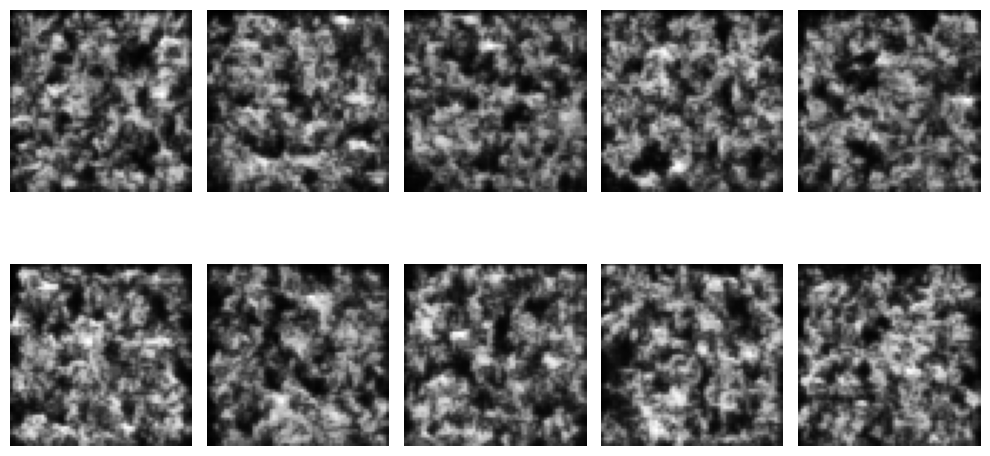

Samples generated with 10 steps:


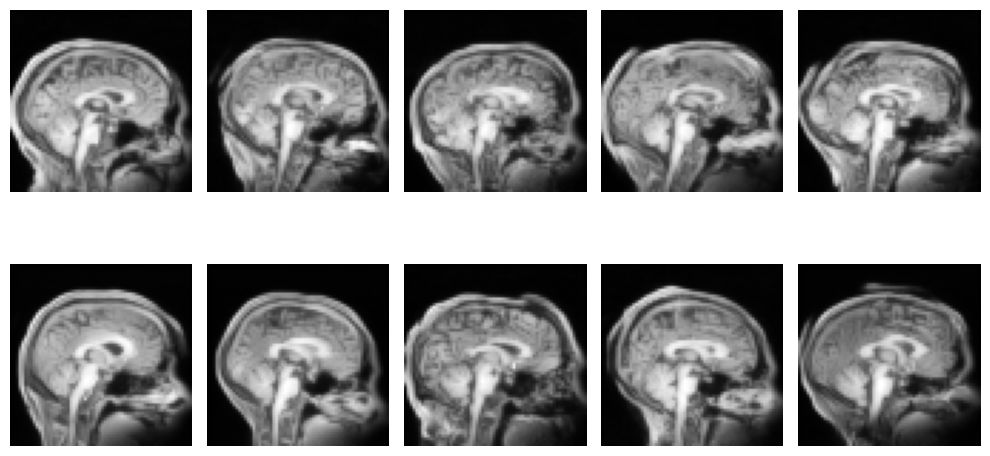

Samples generated with 50 steps:


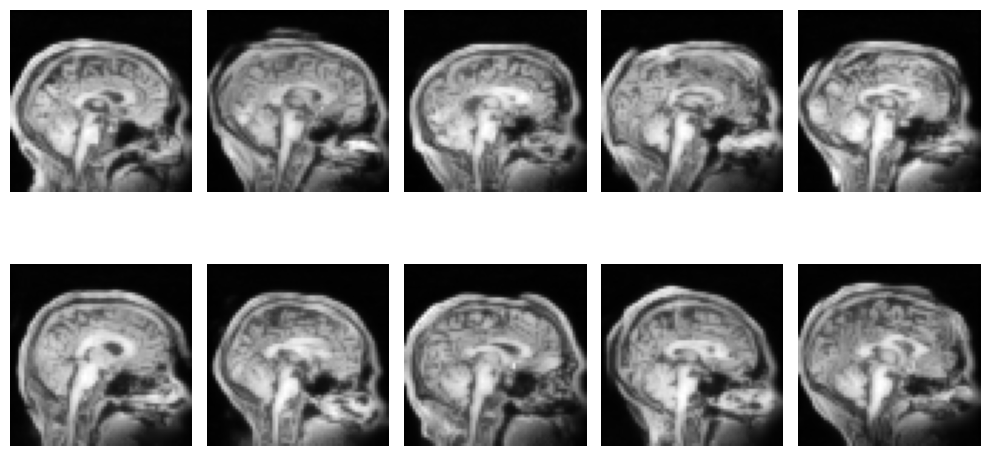

Samples generated with 100 steps:


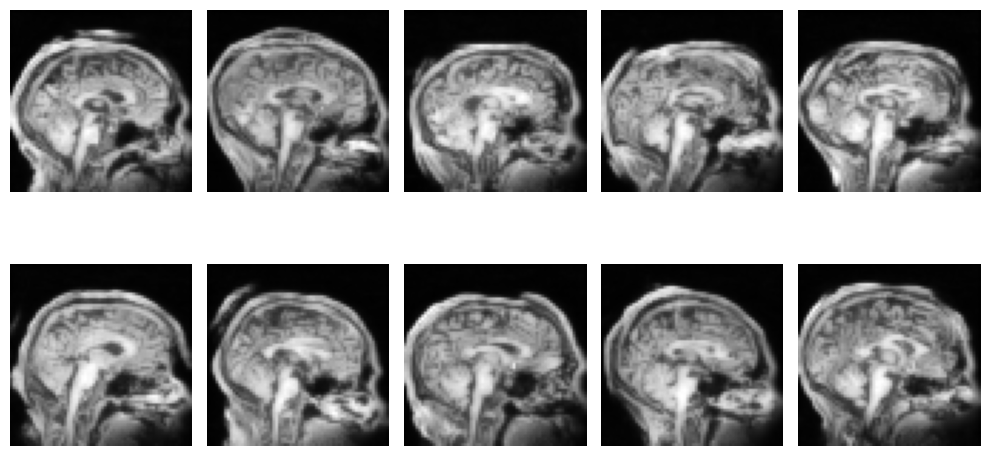

In [5]:
# chaning steps to see differences
print('Samples generated with 1 step:')
plot_images(samples_3)

print('Samples generated with 10 steps:')
plot_images(samples_1)

print('Samples generated with 50 steps:')
plot_images(samples_2)

print('Samples generated with 100 steps:')
plot_images(samples_4)



# Discussion

50 steps provides noticably more detail than 10 but is very similar to 100 steps, in the interest of saving time and computing power as well as capturing a reasonable amount of detail, 50 steps will be used to generate training data.

## Corrupted Data

In [6]:
try:
    from google.colab import drive
    drive.mount('/content/drive')
except:
    pass

file_path = "/content/drive/My Drive/Colab Notebooks/dl-module-coursework-1-esemsc-elm224-master/test_set.npy"
test_data = np.load(file_path)

Mounted at /content/drive


In [7]:
# Display information about the loaded data
print(f"Shape of data: {test_data.shape}")
print(f"Data type: {test_data.dtype}")

Shape of data: (100, 1, 64, 64)
Data type: float32


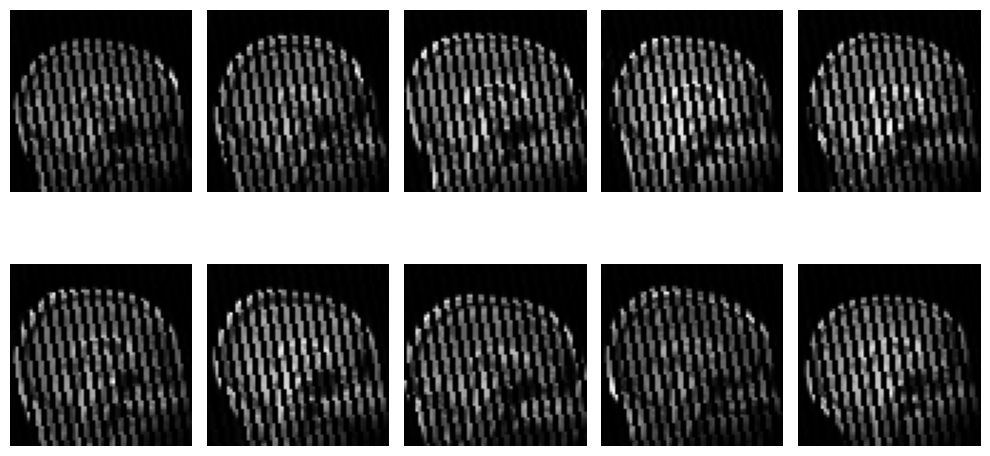

In [103]:

#plotting test (corrupted data)
plt.figure(figsize=(10, 6))

for i in range(10):
    plt.subplot(2, 5, i + 1)

    image = test_data[i].squeeze(0)

    plt.imshow(image, cmap="gray")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [9]:
samples_saved1 = generate(10000,50,64)

Batch 0


100%|██████████| 50/50 [00:05<00:00,  8.49it/s]


Batch 1


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 2


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 3


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 4


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 5


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 6


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 7


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 8


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 9


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 10


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 11


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 12


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 13


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 14


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 15


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 16


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 17


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 18


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 19


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 20


100%|██████████| 50/50 [00:06<00:00,  8.31it/s]


Batch 21


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 22


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 23


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 24


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 25


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 26


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 27


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 28


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 29


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 30


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 31


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 32


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 33


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 34


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 35


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 36


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 37


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 38


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 39


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 40


100%|██████████| 50/50 [00:05<00:00,  8.34it/s]


Batch 41


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 42


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 43


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 44


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 45


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 46


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 47


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 48


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 49


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 50


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 51


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 52


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 53


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 54


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 55


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 56


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 57


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 58


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 59


100%|██████████| 50/50 [00:06<00:00,  8.33it/s]


Batch 60


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 61


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 62


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 63


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 64


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 65


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 66


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 67


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 68


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 69


100%|██████████| 50/50 [00:05<00:00,  8.34it/s]


Batch 70


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 71


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 72


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 73


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 74


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 75


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 76


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 77


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 78


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 79


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 80


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 81


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 82


100%|██████████| 50/50 [00:05<00:00,  8.39it/s]


Batch 83


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 84


100%|██████████| 50/50 [00:05<00:00,  8.39it/s]


Batch 85


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 86


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 87


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 88


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 89


100%|██████████| 50/50 [00:05<00:00,  8.35it/s]


Batch 90


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 91


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 92


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 93


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 94


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 95


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 96


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 97


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 98


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 99


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 100


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 101


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 102


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 103


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 104


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 105


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 106


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 107


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 108


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 109


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 110


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 111


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 112


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 113


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 114


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 115


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 116


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 117


100%|██████████| 50/50 [00:05<00:00,  8.39it/s]


Batch 118


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 119


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 120


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 121


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 122


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 123


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 124


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 125


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 126


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 127


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 128


100%|██████████| 50/50 [00:06<00:00,  8.30it/s]


Batch 129


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 130


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 131


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 132


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 133


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 134


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 135


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 136


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 137


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 138


100%|██████████| 50/50 [00:06<00:00,  8.33it/s]


Batch 139


100%|██████████| 50/50 [00:05<00:00,  8.37it/s]


Batch 140


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 141


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 142


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 143


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 144


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 145


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 146


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 147


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 148


100%|██████████| 50/50 [00:06<00:00,  8.32it/s]


Batch 149


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 150


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 151


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 152


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 153


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 154


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 155


100%|██████████| 50/50 [00:05<00:00,  8.38it/s]


Batch 156


100%|██████████| 50/50 [00:01<00:00, 25.85it/s]


10000 samples were generated to provide enough data for the models to be exposed to. Originally only 1000 were used but using 10000 increased the reconstructions provided by the models. Run time to generate 10000 images ~10 mins.

In [10]:
for idx, tensor in enumerate(samples_saved1):
    print(f"Tensor {idx} shape: {tensor.shape}")

concatenated_tensor = torch.cat(samples_saved1[:], dim=0)  # Concatenate all but the last
print(f"Concatenated tensor shape: {concatenated_tensor.shape}")

Tensor 0 shape: torch.Size([64, 1, 64, 64])
Tensor 1 shape: torch.Size([64, 1, 64, 64])
Tensor 2 shape: torch.Size([64, 1, 64, 64])
Tensor 3 shape: torch.Size([64, 1, 64, 64])
Tensor 4 shape: torch.Size([64, 1, 64, 64])
Tensor 5 shape: torch.Size([64, 1, 64, 64])
Tensor 6 shape: torch.Size([64, 1, 64, 64])
Tensor 7 shape: torch.Size([64, 1, 64, 64])
Tensor 8 shape: torch.Size([64, 1, 64, 64])
Tensor 9 shape: torch.Size([64, 1, 64, 64])
Tensor 10 shape: torch.Size([64, 1, 64, 64])
Tensor 11 shape: torch.Size([64, 1, 64, 64])
Tensor 12 shape: torch.Size([64, 1, 64, 64])
Tensor 13 shape: torch.Size([64, 1, 64, 64])
Tensor 14 shape: torch.Size([64, 1, 64, 64])
Tensor 15 shape: torch.Size([64, 1, 64, 64])
Tensor 16 shape: torch.Size([64, 1, 64, 64])
Tensor 17 shape: torch.Size([64, 1, 64, 64])
Tensor 18 shape: torch.Size([64, 1, 64, 64])
Tensor 19 shape: torch.Size([64, 1, 64, 64])
Tensor 20 shape: torch.Size([64, 1, 64, 64])
Tensor 21 shape: torch.Size([64, 1, 64, 64])
Tensor 22 shape: tor

In [11]:
# saving data to drive Chat GPT helped with this

save_dir = "/content/drive/My Drive/Colab Notebooks/dl-module-coursework-1-esemsc-elm224-master/generated_images"
os.makedirs(save_dir, exist_ok=True)

tensor_cpu = concatenated_tensor.cpu().numpy()
np.save(os.path.join(save_dir, 'generated_images.npy'), tensor_cpu)

print('Saved')



Saved


## Data Sets

In [13]:
 # accessing data

file_path_train = "/content/drive/My Drive/Colab Notebooks/dl-module-coursework-1-esemsc-elm224-master/generated_images/generated_images.npy"
train_data_raw = np.load(file_path_train)
file_path_test = "/content/drive/My Drive/Colab Notebooks/dl-module-coursework-1-esemsc-elm224-master/test_set.npy"
test_data_raw = np.load(file_path_test)

# inspecting data sets
print(train_data_raw.shape)
print(test_data_raw.shape)
print(np.min(train_data_raw), np.max(train_data_raw))


(10000, 1, 64, 64)
(100, 1, 64, 64)
0.00787 0.7485


In [14]:
#creatibg torch tensors
test_data_tensor = torch.from_numpy(test_data_raw)
train_data_tensor = torch.from_numpy(train_data_raw)

## Creating Corrupted Images
In order to create corrupted images i extracted the mask from the test set. This was done by summing all the test images and extarcting the black pixels (value 0).

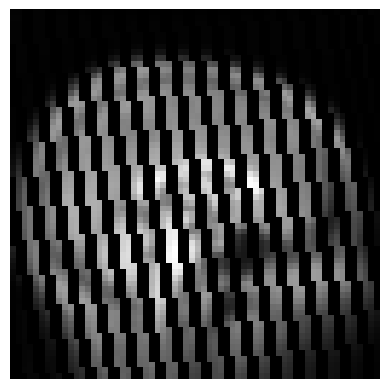

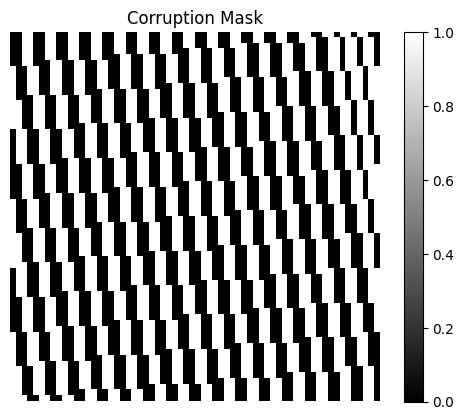

In [15]:
# summing images and showing sum
summed_image = test_data_tensor.sum(dim=0).squeeze(0)
plt.imshow(summed_image, cmap="gray")
plt.axis("off")
plt.show()

#extracting mask and plotting it
mask = (summed_image == 0).float()

plt.imshow(mask, cmap='gray')
plt.colorbar()
plt.title("Corruption Mask")
plt.axis('off')
plt.show()

In [16]:
def corrupt_images(images):
  '''
  Function to apply mask defined above to corrupted images
  Args - images
  Returns - corrupted images
  '''

    # corrupting images using above mask
    corrupted_images = images.clone()
    corrupted_images = corrupted_images * mask

    return corrupted_images



Applying corruption to images

In [17]:
#corrupting images
corrupted_train = corrupt_images(train_data_tensor)

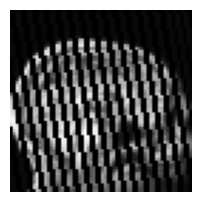

In [18]:

corrupted_train_np = corrupted_train.cpu().numpy()

#plotting a corrupted image
plt.figure(figsize=(10, 6))
image = corrupted_train_np[1].squeeze(0)

plt.imshow(image, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

In [19]:
#inspecting data sets

print(train_data_tensor.shape)
print(corrupted_train.shape)
print(test_data_tensor.shape)

torch.Size([10000, 1, 64, 64])
torch.Size([10000, 1, 64, 64])
torch.Size([100, 1, 64, 64])


In [68]:


train_dataset = TensorDataset(corrupted_train, train_data_tensor)

#train val split = 0.9
train_size = int(0.9 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])


#test_dataset = Dataset(test_data_raw)
test_dataset = TensorDataset(test_data_tensor)

#initialize data loaders
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

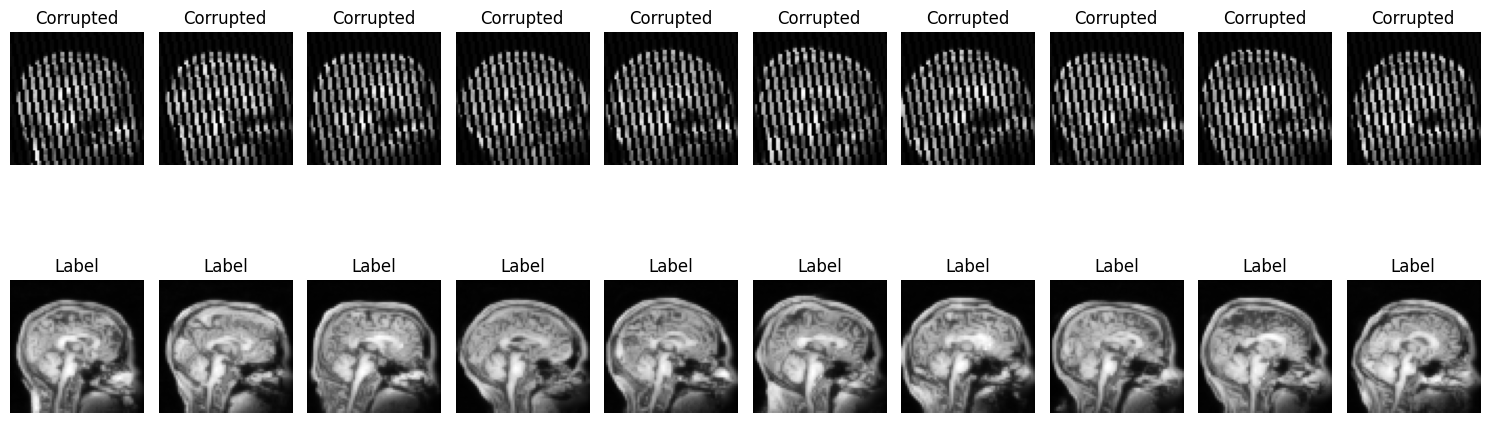

In [69]:
data_iter = iter(train_loader)
corrupted_images, labels = next(data_iter)

# show 10 images in train loader
plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    image = corrupted_images[i].squeeze(0)
    plt.imshow(image, cmap='gray')
    plt.title("Corrupted")
    plt.axis('off')

    plt.subplot(2, 10, i + 11)
    label = labels[i].squeeze(0)
    plt.imshow(label, cmap='gray')
    plt.title("Label")
    plt.axis('off')

plt.tight_layout()
plt.show()

Above shows a sample of synthetically corrupted images along woth the corresponding orignal image "label"

In [22]:

#view trainloader information

data_iter = iter(train_loader)
sample_batch = next(data_iter)
print(f"Batch Data Shape: {sample_batch[0].shape}")  # Input tensor shape
print(f"Batch Labels Shape: {sample_batch[1].shape}")  # Label tensor shape



Batch Data Shape: torch.Size([32, 1, 64, 64])
Batch Labels Shape: torch.Size([32, 1, 64, 64])


## CNN Auto Encoder

A CNN autoencoder is used for multiple reasons. CNNs perform well with local feature understanding, whilst the bottle neck structure of autoencoders allows for generalization and understanding of the most essential information - reducing overfitting.

Batchnorm is included to reduced the risk and vanishing gradients and stablizes the model.

Max pooling allows for increased sensitivity to features such as edges and textures - vital in detailed images such as these.

In [23]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        # progressively reduce spatial dimensions and increase feature channels
        self.enc1 = nn.Conv2d(1, 8, kernel_size=3, padding=1)
        self.enc1_bn = nn.BatchNorm2d(8)
        self.enc2 = nn.Conv2d(8, 16, kernel_size=3, padding=1)
        self.enc2_bn = nn.BatchNorm2d(16)
        self.enc3 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.enc3_bn = nn.BatchNorm2d(32)
        self.pool = nn.MaxPool2d(2, 2)

        #captures compressed latent representation
        self.bottleneck = nn.Conv2d(32, 64, kernel_size=3, padding=1)  # Bottleneck layer
        self.bottleneck_bn = nn.BatchNorm2d(64)  # Normalize bottleneck output

        #progressively increase spatial dimensions and decrease feature channels
        self.dec1 = nn.Conv2d(64, 32, kernel_size=3, padding=1)
        self.dec1_bn = nn.BatchNorm2d(32)
        self.dec2 = nn.Conv2d(32, 16, kernel_size=3, padding=1)
        self.dec2_bn = nn.BatchNorm2d(16)
        self.dec3 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.dec3_bn = nn.BatchNorm2d(8)
        self.out = nn.Conv2d(8, 1, kernel_size=3, padding=1)  # final layer to reconstruct the input image

    def forward(self, x):

        # forward pass implemenation of above
        x = F.relu(self.enc1_bn(self.enc1(x)))
        x = F.relu(self.enc2_bn(self.enc2(x)))
        x = self.pool(F.relu(self.enc3_bn(self.enc3(x))))
        x = self.pool(F.relu(self.bottleneck_bn(self.bottleneck(x))))

        x = F.relu(self.dec1_bn(self.dec1(F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True))))  # First decoding layer
        x = F.relu(self.dec2_bn(self.dec2(F.interpolate(x, scale_factor=2, mode='bilinear', align_corners=True))))  # Second decoding layer
        x = F.relu(self.dec3_bn(self.dec3(x)))
        x = torch.sigmoid(self.out(x))

        return x


In [41]:
def train(model, train_loader, criterion, optimizer):

 '''Trains model based on the given criterion and optimizer
   Args - model, train_loader, criterion, optimizer
   Returns - train loss

  '''

    model.train()
    train_loss = 0

    # cycle through data
    for input, target in train_loader:
        input, target = input.to(device).float(), target.to(device).float()
        optimizer.zero_grad()

        output = model(input)

        # if statement to compare loss functions
        if isinstance(criterion, nn.MSELoss):
            loss = criterion(output, target)
        elif isinstance(criterion, SSIM):
            loss = 1 - criterion(output, target)

        # pass loss back
        loss.backward()
        train_loss += loss.item()*input.size(0)
        optimizer.step()

    train_loss = train_loss / len(train_loader.dataset)
    return train_loss



def valid(model, criterion, data_loader):

    # initiate eval
    model.eval()
    valid_loss = 0.
    with torch.no_grad():
        for input, target in data_loader:
            input, target = input.to(device).float(), target.to(device).float()

            #make prediction
            output = model(input).float()

            #determine loss based on target
            loss = criterion(output, target)
            valid_loss += loss*input.size(0)
        valid_loss = valid_loss / len(data_loader.dataset)
        return valid_loss


## Exploring Loss Functions

In [73]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#initiating models
model1 = Autoencoder()
model1.to(device)

model2 = Autoencoder()
model2.to(device)

#different losses
criterion1 = nn.MSELoss()
criterion2 = SSIM(data_range=1.0, size_average=True, channel=1)

#both ada optimizers
optimizer1 = torch.optim.Adam(model1.parameters(), lr=0.02)
optimizer2 = torch.optim.Adam(model2.parameters(), lr=0.02)

epochs = 50

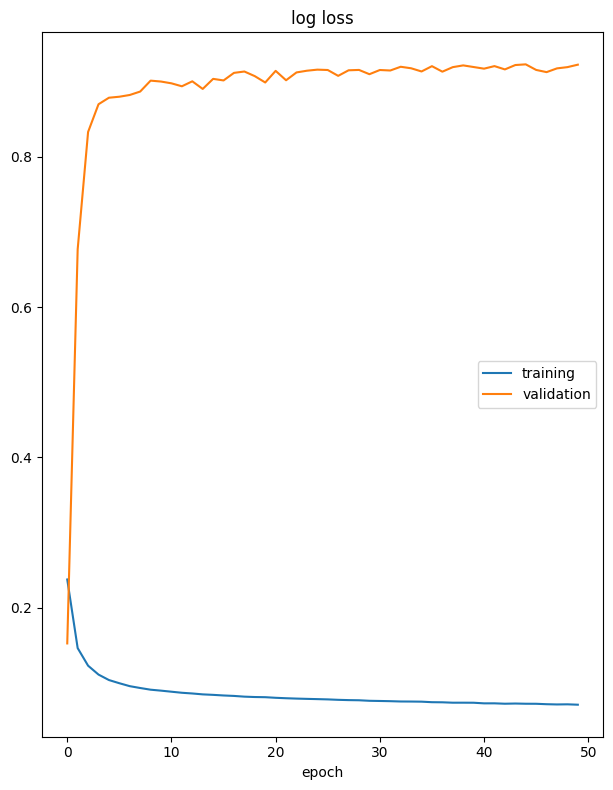

log loss
	training         	 (min:    0.071, max:    0.238, cur:    0.071)
	validation       	 (min:    0.153, max:    0.923, cur:    0.922)


In [75]:
liveloss = PlotLosses()
print("MSE Loss")
for epoch in range(epochs):

    valid_loss = valid(model1, criterion1, val_loader)
    train_loss = train(model1, train_loader, criterion1, optimizer1)



    # robustness - chat GPT helped debug
    train_loss = train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss
    valid_loss = valid_loss.item() if isinstance(valid_loss, torch.Tensor) else valid_loss


    logs = {
        'log loss': train_loss,
        'val_log loss': valid_loss
    }

    liveloss.update(logs)
    liveloss.send()


liveloss = PlotLosses()

print("SSIM Loss")
for epoch in range(epochs):

    valid_loss = valid(model2, criterion2, val_loader)
    train_loss = train(model2, train_loader, criterion2, optimizer2)


    # robustness - chat GPT helped debug
    train_loss = train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss
    valid_loss = valid_loss.item() if isinstance(valid_loss, torch.Tensor) else valid_loss


    logs = {
        'log loss': train_loss,
        'val_log loss': valid_loss
    }

    liveloss.update(logs)
    liveloss.send()




<br>

---

<br>

In [94]:

def display_predictions(model, val_loader, device, num_samples=5):
    # initiate eval
    model.eval()
    with torch.no_grad():

        for i, batch in enumerate(val_loader):

            #extract data and labels

            input_data, labels = batch
            if isinstance(batch, (tuple, list)):
                input_data, labels = batch
            else:
                pass

            input_data = input_data.to(device).float()

            #making reconstructions
            predictions = model(input_data).cpu()
            input_data = input_data.cpu()
            labels = labels.cpu()


            #plotting predictions

            for j in range(min(num_samples, input_data.size(0))):
                fig, axes = plt.subplots(1, 3, figsize=(15, 5))

                axes[0].imshow(input_data[j, 0].numpy(), cmap="gray")
                axes[0].set_title("Input (Corrupted)")
                axes[0].axis("off")

                axes[1].imshow(labels[j, 0].numpy(), cmap="gray")
                axes[1].set_title("Actual")
                axes[1].axis("off")

                axes[2].imshow(predictions[j, 0].numpy(), cmap="gray")
                axes[2].set_title("Prediction")
                axes[2].axis("off")

                plt.tight_layout()
                plt.show()

            break


Below is a comparison of MSE and SSIM loss functions. As we can see SSIM performs better, this is expected as SSIM is more preferred for deep learning tasks that involve images. SSIM evaluates structural and spacial similarity incorperating luminance and contrast whereas MSE doesnt consider spacial importance. [1]

With SSIM we want a 'Loss' close to 1 (with a vlaue of 1 being an identical image) and with MSE we want to minimze our losses

MSE


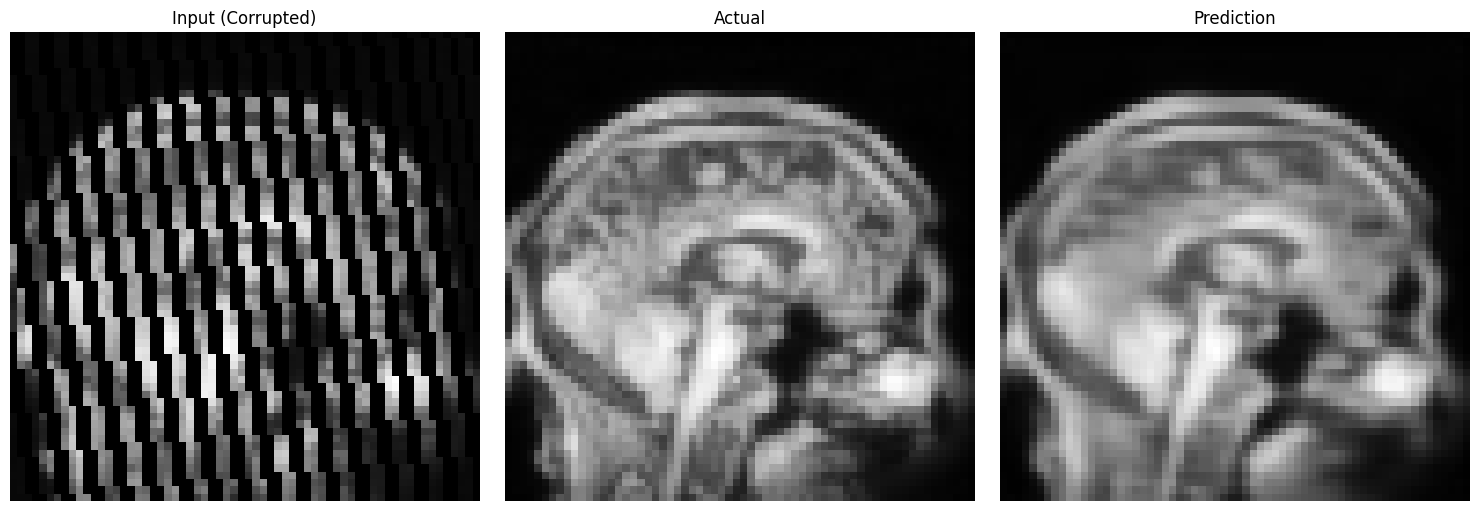

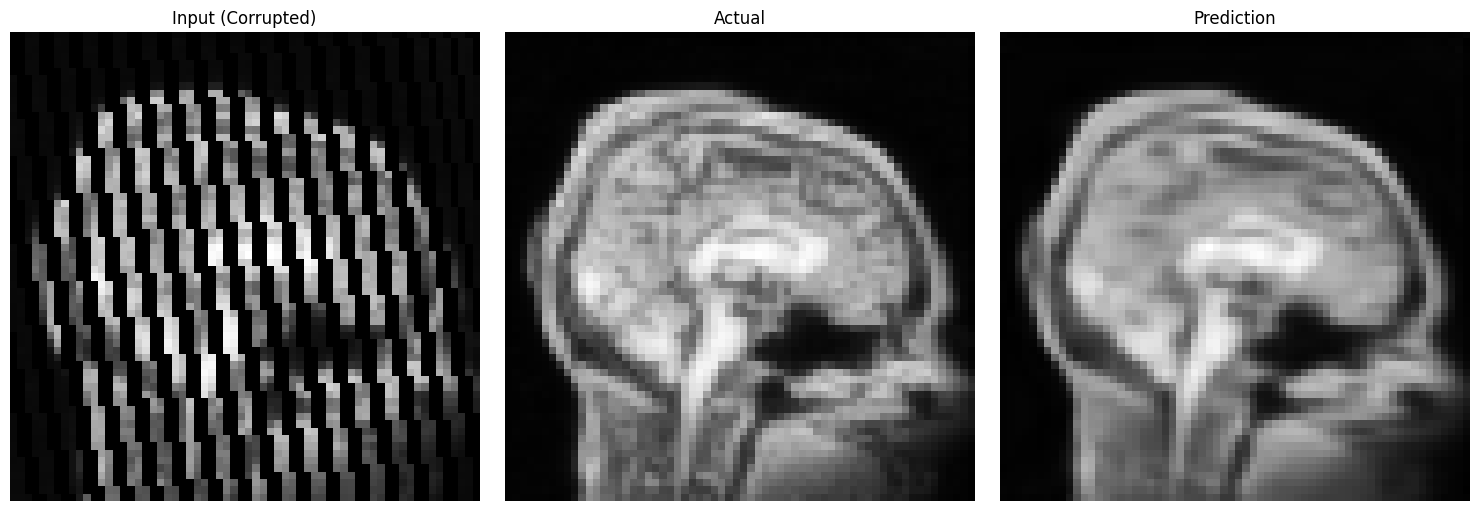

SSIM


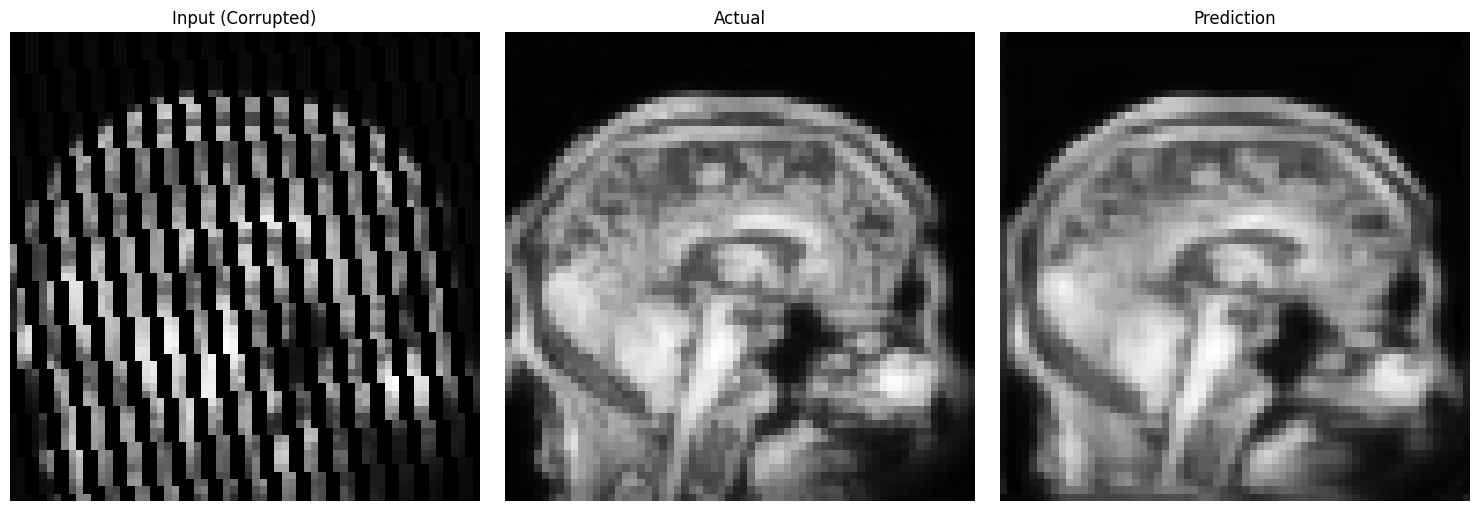

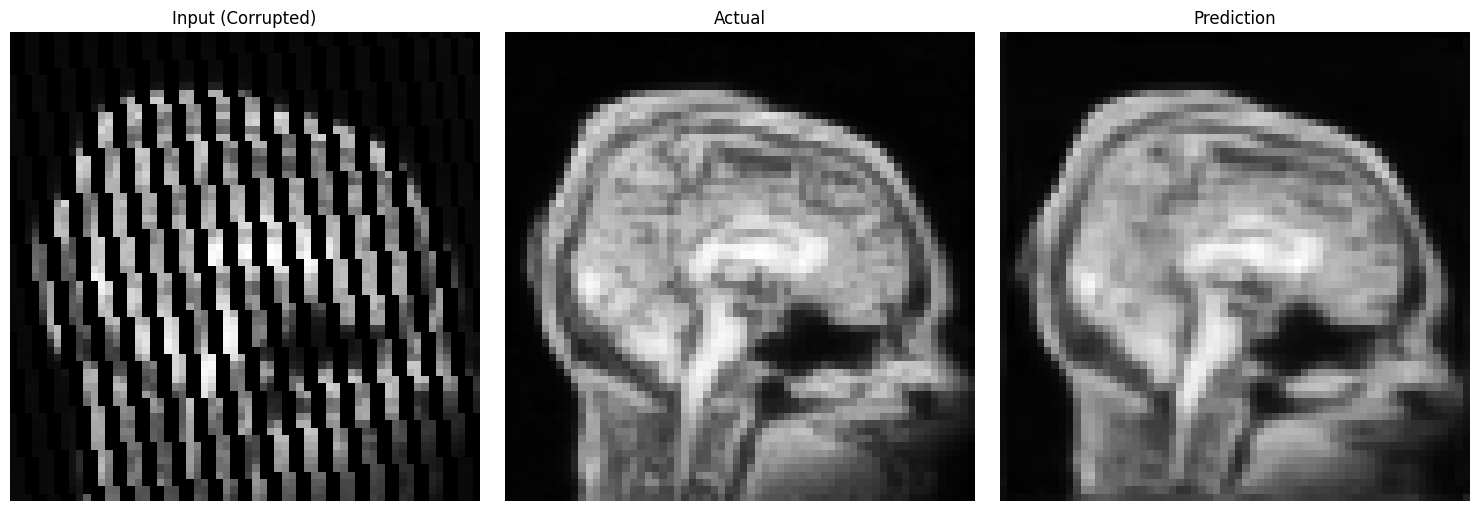

In [29]:
# displaying and comparing MSE and SSIM optimizers

print('MSE')
predictions1 = display_predictions(model1, val_loader, device,2)
print('SSIM')
predictions2 = display_predictions(model2, val_loader, device,2)

## Exploring Optimizers

Here I will compare the performance of the AdaBelief optimizer compared to the Adam optimizer used above. Both optimizers operate similarly but the Adam optimizer produces visually more accurate results

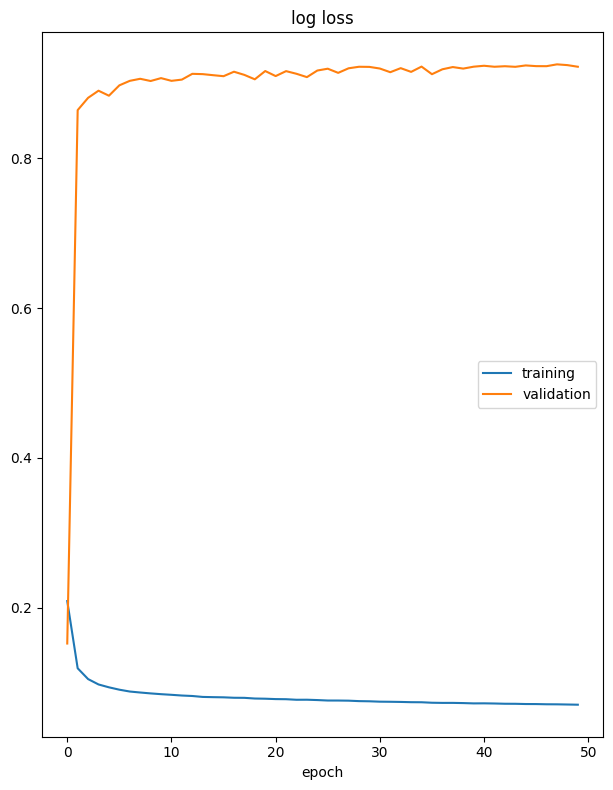

log loss
	training         	 (min:    0.070, max:    0.209, cur:    0.070)
	validation       	 (min:    0.152, max:    0.926, cur:    0.922)


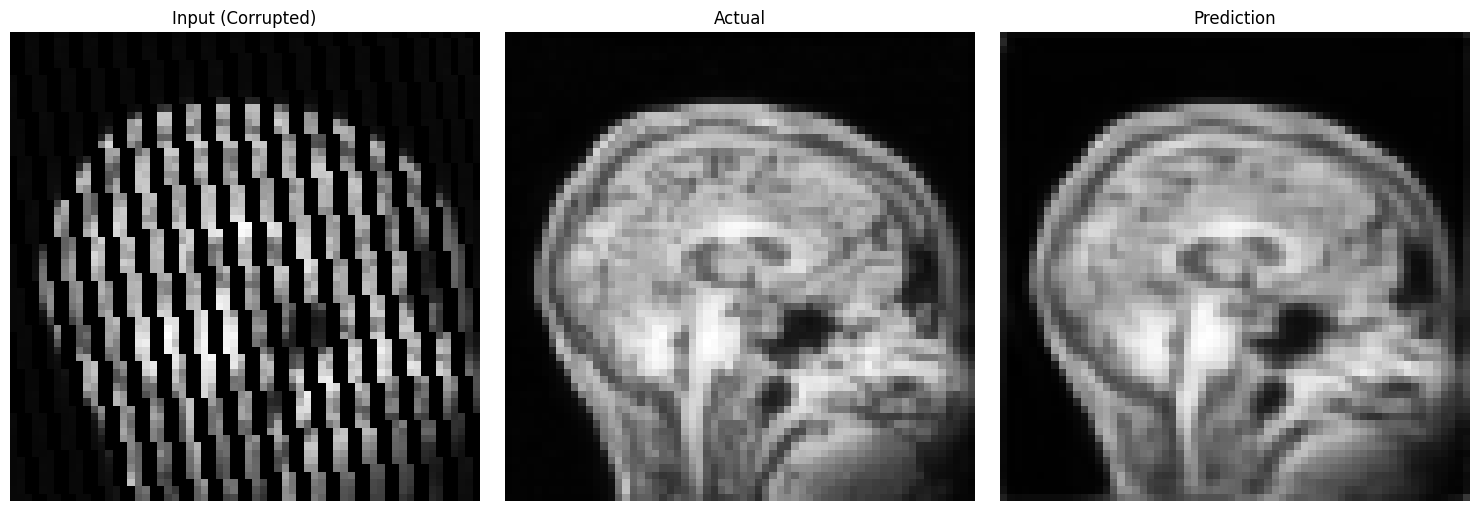

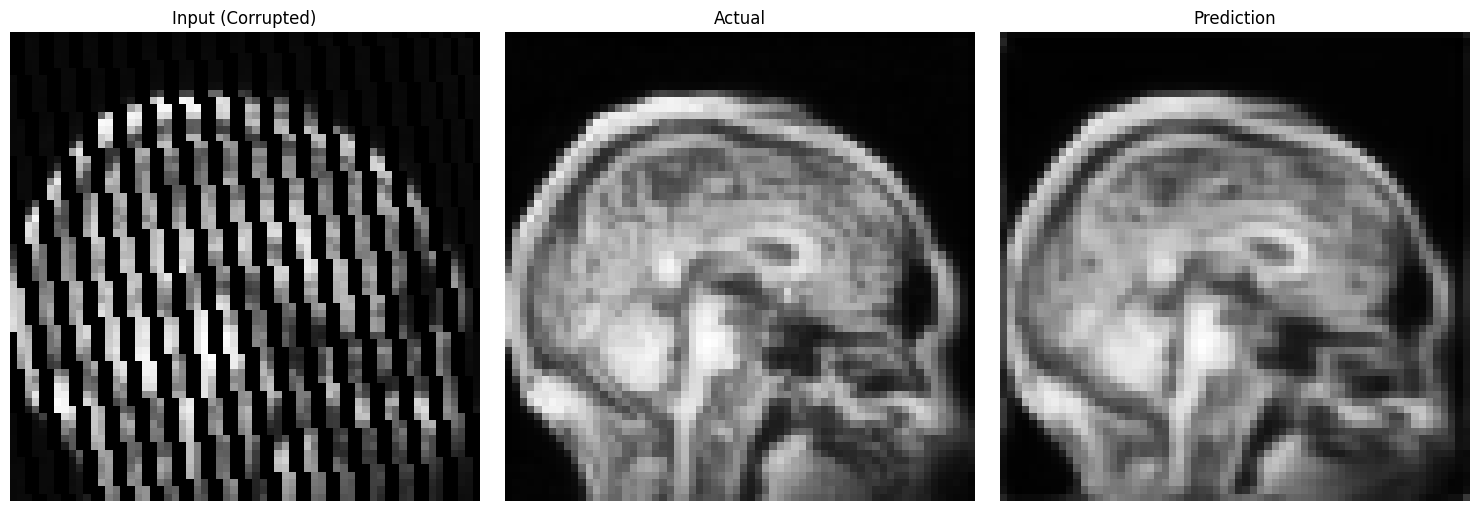

In [72]:
# defining new model
model3 = Autoencoder()
model3.to(device)

#Ada optimizer
optimizer3 = AdaBelief(model3.parameters(), 0.02)

liveloss = PlotLosses()

print("AdaBelief")

#training with Ada
for epoch in range(epochs):

    valid_loss = valid(model3, criterion2, val_loader)
    train_loss = train(model3, train_loader, criterion2, optimizer3)

    # robustness - chat GPT helped debug
    train_loss = train_loss.item() if isinstance(train_loss, torch.Tensor) else train_loss
    valid_loss = valid_loss.item() if isinstance(valid_loss, torch.Tensor) else valid_loss

    # Log for livelossplot
    logs = {
        'log loss': train_loss,
        'val_log loss': valid_loss
    }

    liveloss.update(logs)
    liveloss.send()


predictions3 = display_predictions(model3, val_loader, device,2)



## Implementing an advisorial network to improve reconstructions

From above we can see that the SSIM loss creates the sharpest images along with the the Adam optimizer. Now I will create a discriminator to create an advisorial training environoment.

Here I implement an advisorial network to allow for better reconstructions by implementing a discrimintor to encourage the above CNN autoencoder network to provide more realistic images.
The discriminator takes a similar structure to the original model but has a single output - corresponding to whether the provided image is real or generated.

In [57]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, stride=2, padding=1)
        self.bn1 = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=1)
        self.bn2 = nn.BatchNorm2d(64)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1)
        self.bn3 = nn.BatchNorm2d(128)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=2, padding=1)
        self.bn4 = nn.BatchNorm2d(256)

        self.fc1 = nn.Linear(256 * 4 * 4, 1)

    def forward(self, x):
        x = F.leaky_relu(self.bn1(self.conv1(x)), 0.2)
        x = F.leaky_relu(self.bn2(self.conv2(x)), 0.2)
        x = F.leaky_relu(self.bn3(self.conv3(x)), 0.2)
        x = F.leaky_relu(self.bn4(self.conv4(x)), 0.2)

        x = x.view(x.size(0), -1)
        x = torch.sigmoid(self.fc1(x))

        return x


In [92]:
def train_discriminator(discriminator, autoencoder, real_images, corrupted_images, optimizer, adversarial_loss, device):

    #initializing training of discrim and eval of autoencoder
    discriminator.train()
    autoencoder.eval()

    batch_size = real_images.size(0)

    # 1 = real, 0 = fake
    real_labels = torch.ones(batch_size, 1).to(device)
    fake_labels = torch.zeros(batch_size, 1).to(device)

    real_images = real_images.to(device).float()

    #testing fiscrim on real images
    real_outputs = discriminator(real_images).float()
    d_loss_real = adversarial_loss(real_outputs, real_labels)

    #testing discrim on fake images
    gen_images = autoencoder(corrupted_images.to(device)).detach()
    gen_outputs = discriminator(gen_images)
    d_loss_fake = adversarial_loss(gen_outputs, fake_labels)

    #summing losses as in lectures
    d_loss = (d_loss_real + d_loss_fake)


    optimizer.zero_grad()
    d_loss.backward()
    optimizer.step()

    return d_loss.item()


def train_autoencoder(autoencoder, discriminator, real_images, corrupted_images, optimizer, reconstruction_loss, adversarial_loss, device):
    # initializing training of autoencoder and evaluation of discrim
    autoencoder.train()
    discriminator.eval()

    #real images
    real_images = real_images.to(device).float()

    # generated images
    corrupted_images = corrupted_images.to(device).float()
    reconstructed_images = autoencoder(corrupted_images).float()

    #SSIM loss
    g_recon_loss = 1 - reconstruction_loss(reconstructed_images, real_images)

    # trying to fool discriminator
    real_labels = torch.ones(real_images.size(0), 1).to(device)
    g_adv_loss = adversarial_loss(discriminator(reconstructed_images), real_labels)

    # generator loss is how well it performs agains discriminator and
    # how good the reconstructions are based on the SSIM loss
    g_loss = g_recon_loss + g_adv_loss

    optimizer.zero_grad()
    g_loss.backward()
    optimizer.step()

    return g_loss.item()

def train_gan(autoencoder, discriminator, train_loader, g_optimizer, d_optimizer, reconstruction_loss, adversarial_loss, device, epochs):


    #training over epochs
    for epoch in range(epochs):
        d_loss_epoch = 0.0 #initializing losses
        g_loss_epoch = 0.0

        for corrupted_images, real_images in train_loader:

            real_images = real_images.to(device).float()
            corrupted_images = corrupted_images.to(device).float()

            #extracting discrim training loss
            d_loss = train_discriminator(discriminator, autoencoder, real_images, corrupted_images, d_optimizer, adversarial_loss, device)
            d_loss_epoch += d_loss

            #extracting generator losses
            g_loss = train_autoencoder(autoencoder, discriminator, real_images, corrupted_images, g_optimizer, reconstruction_loss, adversarial_loss, device)
            g_loss_epoch += g_loss

        #normalizing losses as in lectures
        d_loss_epoch /= len(train_loader)
        g_loss_epoch /= len(train_loader)







For the final model Adam optimizers are used as it performed well in previous tests, the generator loss is SSIM as this performed best and the discriminator loss is cross entropy - commonly used for classification.

In [93]:
#defining generator and discriminator
model_AD = Autoencoder().to(device)
discriminator = Discriminator().to(device)

#optimizers
g_optimizer = torch.optim.Adam(model_AD.parameters(), lr=0.02)
d_optimizer = torch.optim.Adam(discriminator.parameters(), 0.02)

#defining losses based on previous finingds
reconstruction_loss = SSIM(data_range=1.0, size_average=True, channel=1)
discrim_loss = nn.BCELoss()

#training advisorial network
train_gan(model_AD, discriminator, train_loader, g_optimizer, d_optimizer, reconstruction_loss, discrim_loss, device, epochs=50)


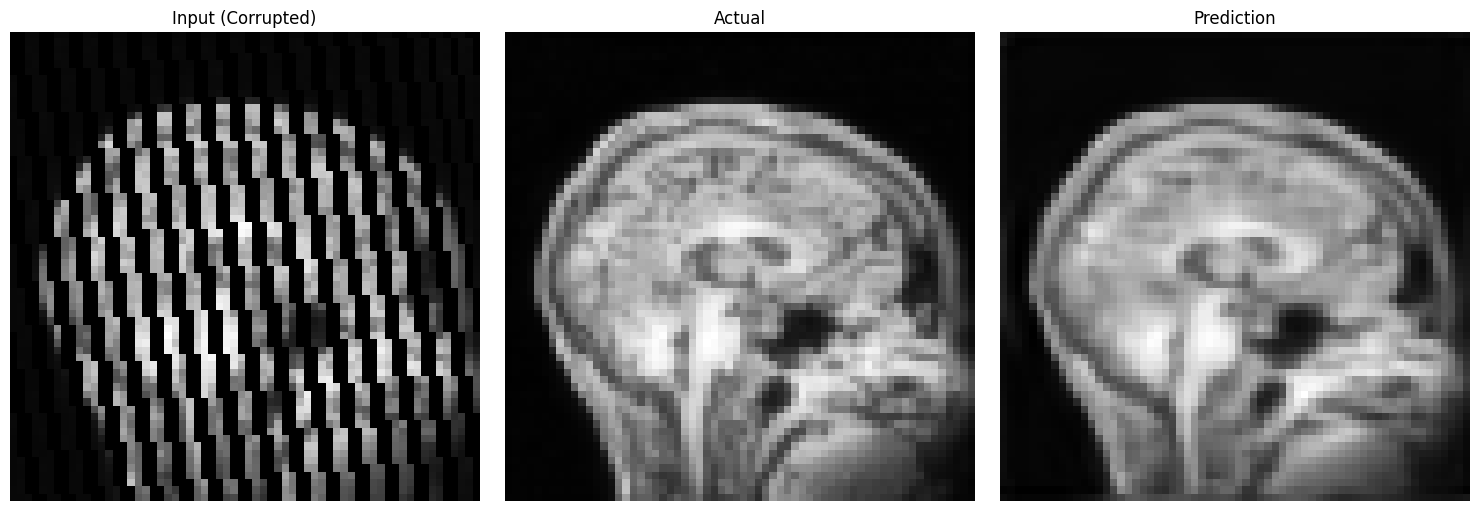

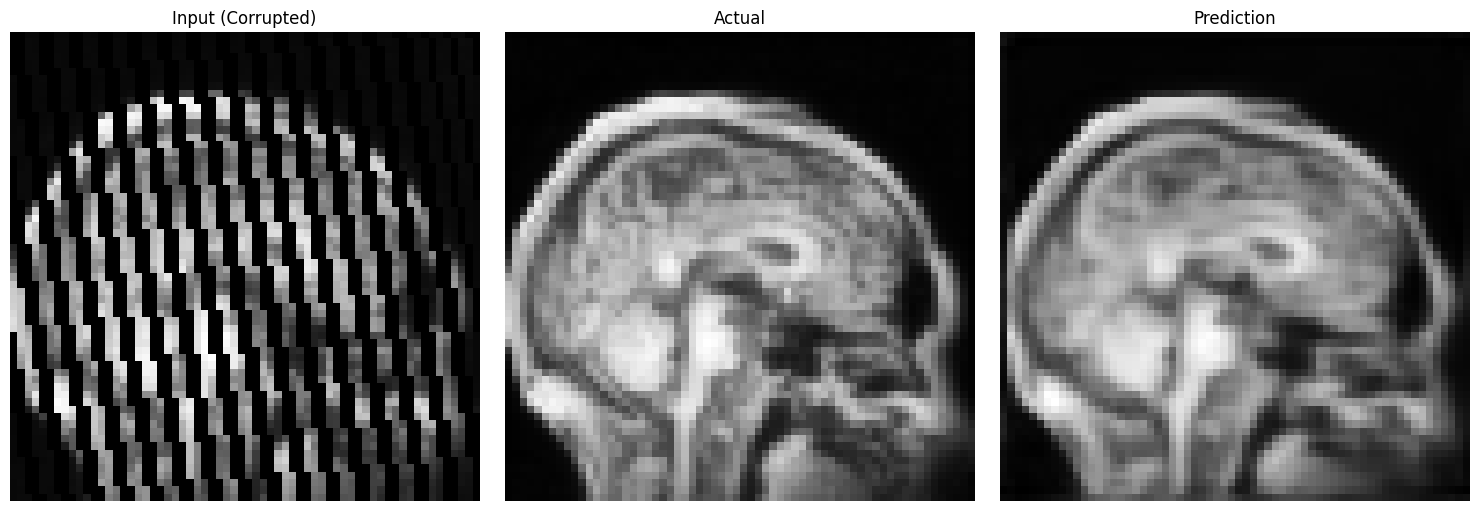

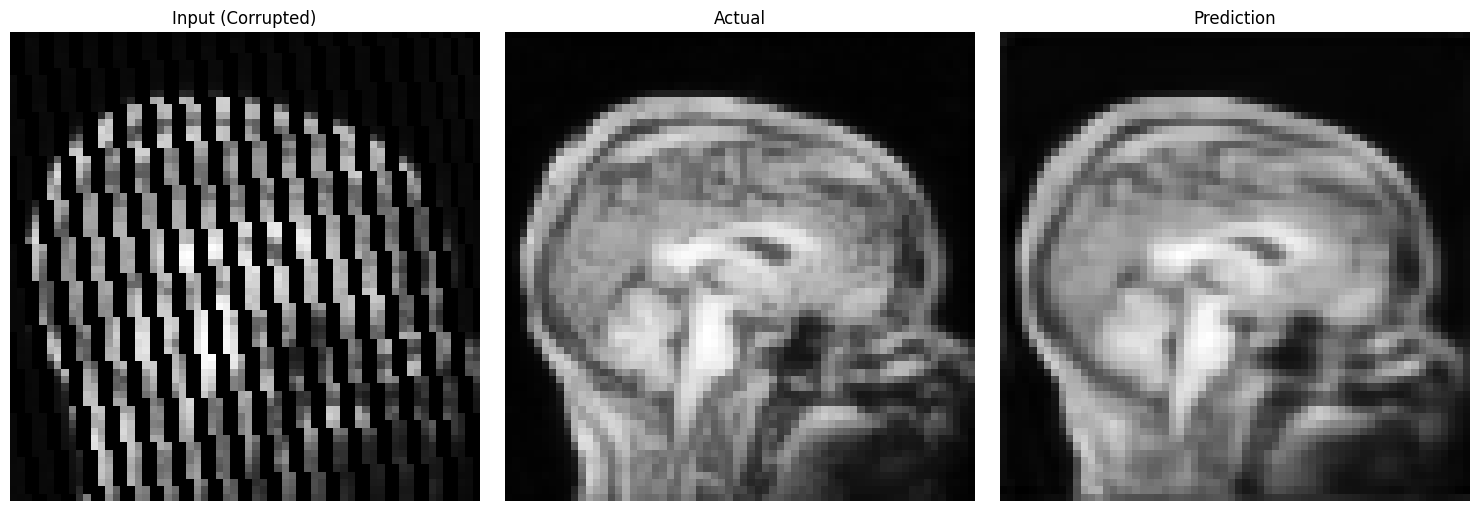

In [97]:
display_predictions(model_AD, val_loader, device, 3)

From above we can see that the advisorial network perfroms very well on the validation set. The macroscopic features are well captured and smaller features are represented - although not always accurate.

## Reconstructing Test Set

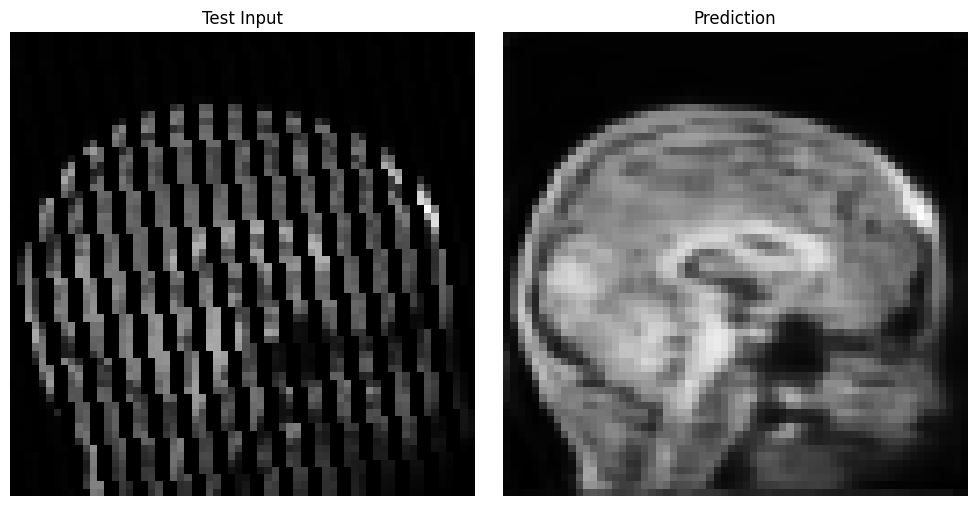

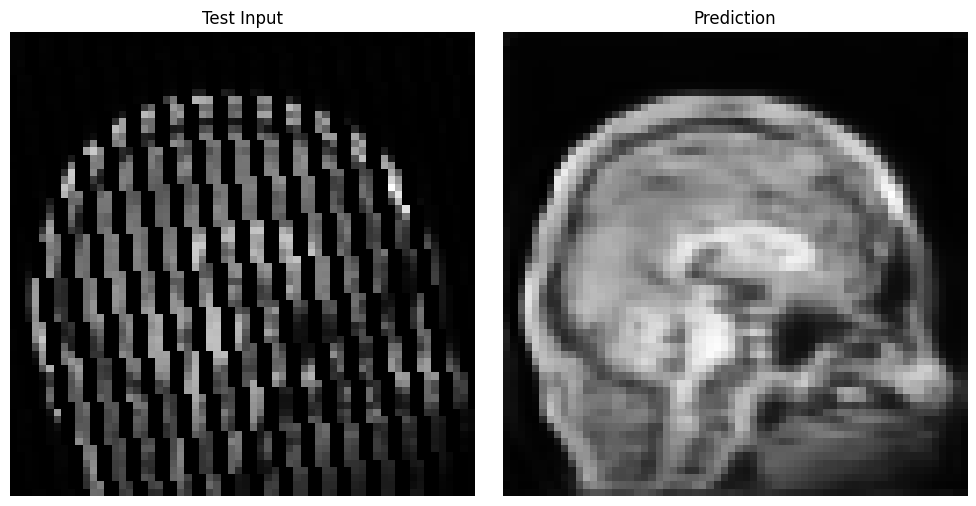

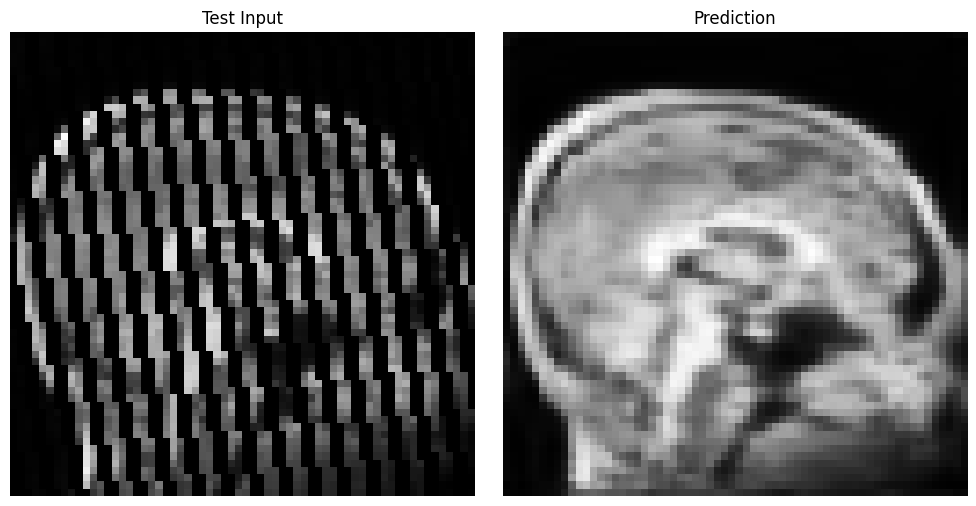

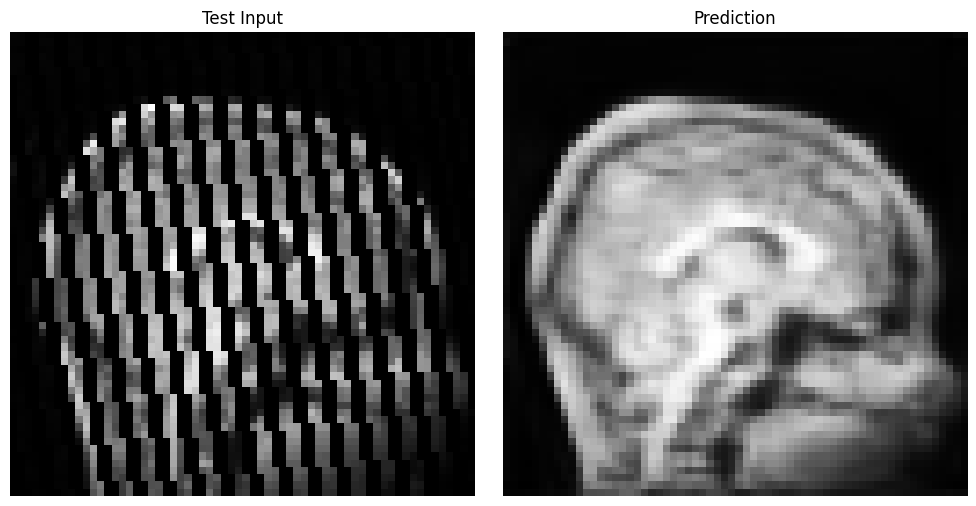

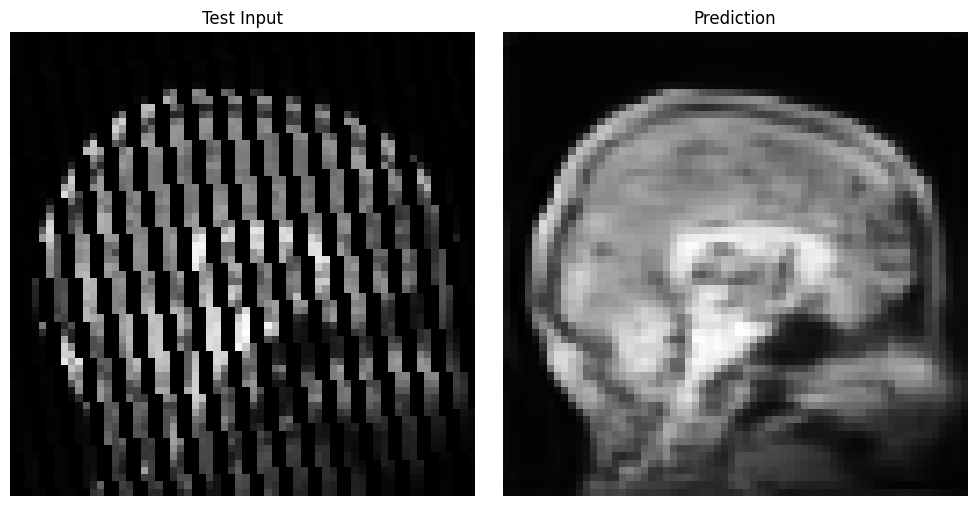

In [102]:
model_AD.eval()
predictions = []

with torch.no_grad():  # Disable gradient computation
    for batch in test_loader:

        # If batch is a tuple or list, extract inputs
        if isinstance(batch, (tuple, list)):
            inputs = batch[0]
        else:
            inputs = batch

        inputs = inputs.to(device).float()
        outputs = model_AD(inputs)  # forward pass
        predictions.append(outputs.cpu())  # Move outputs to CPU for storage

# concat predictions into a single tensor
predictions = torch.cat(predictions, dim=0)

test_inputs = next(iter(test_loader))
if isinstance(test_inputs, (tuple, list)):
    test_inputs = test_inputs[0]  # Extract input if it's a tuple

test_inputs = test_inputs[:5].cpu()  # first 5 samples
predictions = predictions[:5]  #corresponding predictions

# visualize the test inputs and their predictions
for i in range(5):
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))
    axs[0].imshow(test_inputs[i, 0].numpy(), cmap="gray")
    axs[0].set_title("Test Input")
    axs[0].axis("off")
    axs[1].imshow(predictions[i, 0].numpy(), cmap="gray")
    axs[1].set_title("Prediction")
    axs[1].axis("off")
    plt.tight_layout()
    plt.show()
